findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not 

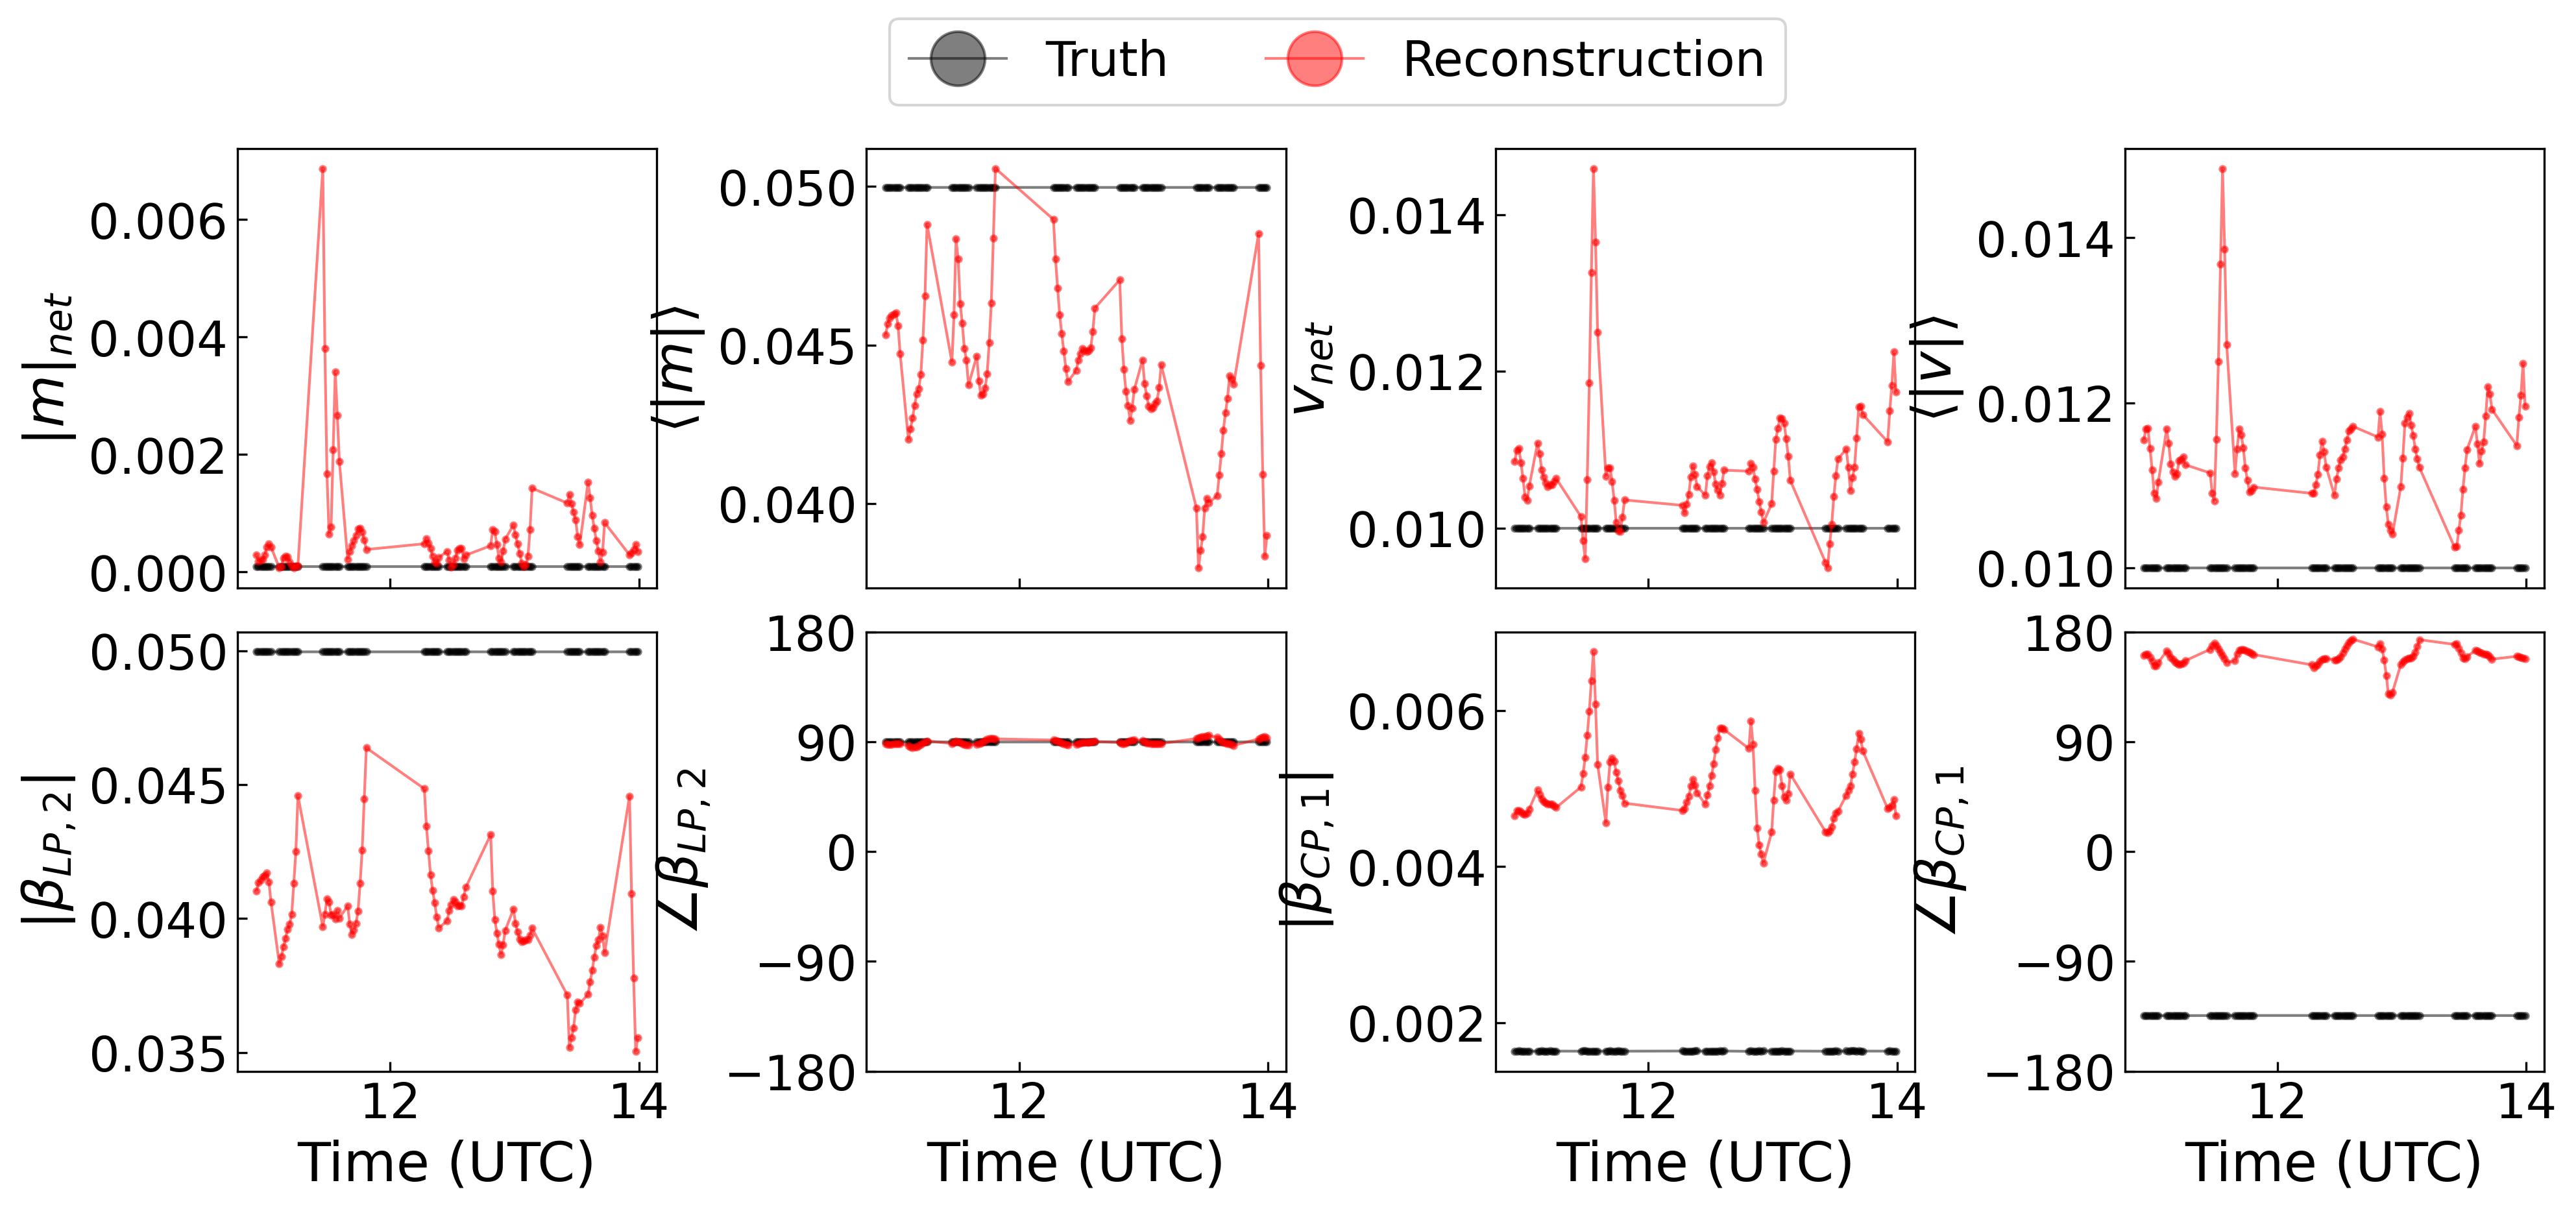

In [2]:
######################################################################
# Author: Rohan Dahale, Date: 13 Mar 2024
######################################################################

# Import libraries
import numpy as np
import pandas as pd
import ehtim as eh
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pdb

import argparse
import os
import glob

######################################################################
# Plotting Setup
######################################################################
#plt.rc('text', usetex=True)
import matplotlib as mpl
#mpl.rc('font', **{'family':'serif', 'serif':['Computer Modern Roman'], 'monospace': ['Computer Modern Typewriter']})
mpl.rcParams['figure.dpi']=300
#mpl.rcParams["mathtext.default"] = 'regular'
plt.rcParams["xtick.direction"]="in"
plt.rcParams["ytick.direction"]="in"
#plt.style.use('dark_background')
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["xtick.labelsize"] = 18
mpl.rcParams["ytick.labelsize"] = 18
mpl.rcParams["legend.fontsize"] = 18

from matplotlib import font_manager
font_dirs = font_manager.findSystemFonts(fontpaths='./fonts/', fontext="ttf")
#mpl.rc('text', usetex=True)

fe = font_manager.FontEntry(
    fname='./fonts/Helvetica.ttf',
    name='Helvetica')
font_manager.fontManager.ttflist.insert(0, fe) # or append is fine
mpl.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
######################################################################

s  = '/mnt/disks/shared/eht/sgra_dynamics_april11/evaluation/scripts/VLX/results/crescent_3601_LO_vida_ring_summary.csv'
s_t  = '/mnt/disks/shared/eht/sgra_dynamics_april11/evaluation/scripts/VLX/results/crescent_3601_LO_vida_truth_ring_summary.csv'
outpath = '/mnt/disks/shared/eht/sgra_dynamics_april11/evaluation/scripts/VLX/results/vida_ring_summary_crescent_3601_LO.png'
######################################################################

df = pd.read_csv(s)
df_t = pd.read_csv(s_t)

times=[]
for t in df['files']:
    times.append(float(os.path.basename(t)[:-5]))
    
m_net = df['m_net']
m_avg = df['m_avg']
betalp_2 = df['re_betalp_2']+ 1j*df['im_betalp_2']
mod_betalp_2=np.abs(betalp_2)
ang_betalp_2=np.rad2deg(np.angle(betalp_2))

v_net = df['v_net']
v_avg = df['v_avg']
betacp_1 = df['re_betacp_1'] + 1j*df['im_betacp_1']
mod_betacp_1 = np.abs(betacp_1)
ang_betacp_1 = np.rad2deg(np.angle(betacp_1))


m_net_t = df_t['m_net']
m_avg_t = df_t['m_avg']
betalp_2_t = df_t['re_betalp_2']+ 1j*df_t['im_betalp_2']
mod_betalp_2_t=np.abs(betalp_2_t)
ang_betalp_2_t=np.rad2deg(np.angle(betalp_2_t))

v_net_t = df_t['v_net']
v_avg_t = df_t['v_avg']
betacp_1_t = df_t['re_betacp_1'] + 1j*df_t['im_betacp_1']
mod_betacp_1_t = np.abs(betacp_1_t)
ang_betacp_1_t = np.rad2deg(np.angle(betacp_1_t))

for i in range(len(ang_betacp_1_t)):
    if ang_betacp_1_t[i]<-180:
        ang_betacp_1_t[i] =  ang_betacp_1_t[i] + 360
    if ang_betacp_1_t[i]>180:
        ang_betacp_1_t[i] =  ang_betacp_1_t[i] - 360
for i in range(len(ang_betacp_1)):
    if ang_betacp_1[i]<-180:
        ang_betacp_1[i] =  ang_betacp_1[i] + 360
    if ang_betacp_1[i]>180:
        ang_betacp_1[i] =  ang_betacp_1[i] - 360
        
        
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,6), sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.5, top=0.8, bottom=0.01, left=0.01, right=0.8)

ax[0,0].set_ylabel('$|m|_{net}$')
ax[0,1].set_ylabel('$ \\langle |m| \\rangle$')
ax[0,2].set_ylabel('$v_{net}$')
ax[0,3].set_ylabel('$ \\langle |v| \\rangle $')

ax[1,0].set_ylabel('$|\\beta_{LP,2}|$')
ax[1,1].set_ylabel('$\\angle \\beta_{LP,2}$')
ax[1,1].set_ylim(-180,180)
ax[1,1].set_yticks([-180,-90,0,90,180])
ax[1,2].set_ylabel('$|\\beta_{CP,1}|$')
ax[1,3].set_ylabel('$ \\angle \\beta_{CP,1}$')
ax[1,3].set_ylim(-180,180)
ax[1,3].set_yticks([-180,-90,0,90,180])


ax[1,0].set_xlabel('Time (UTC)')
ax[1,1].set_xlabel('Time (UTC)')
ax[1,2].set_xlabel('Time (UTC)')
ax[1,3].set_xlabel('Time (UTC)')

mc='black'
alpha = 0.5
lc='black'
ax[0,0].plot(times, m_net_t,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha, label='Truth')
ax[0,1].plot(times, m_avg_t,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)
ax[0,2].plot(times, v_net_t,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)
ax[0,3].plot(times, v_avg_t,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)
ax[1,0].plot(times, mod_betalp_2_t,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)
ax[1,1].plot(times, ang_betalp_2_t,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)
ax[1,2].plot(times, mod_betacp_1_t,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)
ax[1,3].plot(times, ang_betacp_1_t,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)


mc='red'
alpha = 0.5
lc='red'
ax[0,0].plot(times, m_net,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha, label='Reconstruction')
ax[0,1].plot(times, m_avg,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha, label='Reconstruction')
ax[0,2].plot(times, v_net,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha, label='Reconstruction')
ax[0,3].plot(times, v_avg,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha, label='Reconstruction')
ax[1,0].plot(times, mod_betalp_2,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)
ax[1,1].plot(times, ang_betalp_2,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)
ax[1,2].plot(times, mod_betacp_1,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)
ax[1,3].plot(times, ang_betacp_1,  marker ='o', mfc=mc, mec=mc, ms=2, ls='-', lw=1,  color=lc, alpha=alpha)


       
ax[0,0].legend(ncols= 2, loc='best',  bbox_to_anchor=(3.75, 1.35), markerscale=10)
plt.savefig(outpath, bbox_inches='tight', dpi=300)